In [1]:

from large_gcs.contact.contact_location import *
from large_gcs.contact.contact_pair_mode import *
from large_gcs.contact.rigid_body import *
from large_gcs.geometry.polyhedron import Polyhedron
from large_gcs.graph.contact_graph import ContactGraph
import random

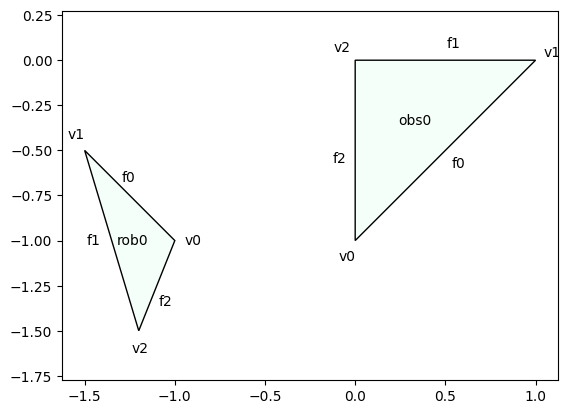

In [2]:
# 2 items
obs_vertices = [
    np.array([[0, 0], [1, 0], [0, -1]])
]
obj_vertices = [
]
rob_vertices = [
    np.array([[-1,-1],[-1.5,-0.5],[-1.2, -1.5]])
]

# # 2 movable items
# obs_vertices = [
# ]
# obj_vertices = [
#     np.array([[0, 0], [1, 0], [1, 1], [0,1]]) + np.array([2.5,0.5])
# ]
# rob_vertices = [
#     np.array([[-1,-1],[-1.5,-0.5],[-1.2, -1.5]])
# ]

# 3 items
# obs_vertices = [
#     np.array([[0, 0], [1, 0], [0, -1]])
# ]
# obj_vertices = [
#     np.array([[0, 0], [1, 0], [1, 1], [0,1]]) + np.array([2.5,0.5])
# ]
# rob_vertices = [
#     np.array([[-1,-1],[-1.5,-0.5],[-1.2, -1.5]])
# ]

# # 3 boxes
# obs_vertices = [
#     np.array([[0, 0], [2, 0], [2, 1], [0,1]])
# ]
# obj_vertices = [
#     np.array([[0, 0], [1, 0], [1, 1], [0,1]]) + np.array([2.5,0.5])
# ]
# rob_vertices = [
#     np.array([[0, 0], [0.5, 0], [0.5, 0.5], [0,0.5]]) + np.array([0,-1])
# ]

# # 4 items
# obs_vertices = [
#     np.array([[0, 0], [1, 0], [0, -1]])
# ]
# obj_vertices = [
#     np.array([[0, 0], [1, 0], [1, -0.5]]) + np.array([1.5, 0]),
#     np.array([[0, 0], [1, 0], [1, 1], [0,1]]) + np.array([2.5,0.5])
# ]
# rob_vertices = [
#     np.array([[-1,-1],[-1.5,-0.5],[-1.2, -1.5]])
# ]
obs = []
objs = []
robs = []
for i in range(len(obs_vertices)):
    obs.append(RigidBody(name=f"obs{i}", geometry=Polyhedron.from_vertices(obs_vertices[i]),
                mobility_type=MobilityType.STATIC))
for i in range(len(obj_vertices)):
    objs.append(RigidBody(name=f"obj{i}", geometry=Polyhedron.from_vertices(obj_vertices[i]),
                mobility_type=MobilityType.UNACTUATED))
for i in range(len(rob_vertices)):
    robs.append(RigidBody(name=f"rob{i}", geometry=Polyhedron.from_vertices(rob_vertices[i]),
                mobility_type=MobilityType.ACTUATED))
all_rigid_bodies = obs + objs + robs

for rigid_body in all_rigid_bodies:
    rigid_body.plot()

In [3]:
contact_graph = ContactGraph(obs, objs, robs)

print(contact_graph.params)


vars_pos shape (2, 2)
vars_all shape (4,)
Generating contact sets for 2 bodies...
Generating contact pair modes for 1 body pairs...


100%|██████████| 1/1 [00:00<00:00, 53.30it/s]


Each body pair has on average 9.0 modes
Generating contact sets for 9 sets...


100%|██████████| 9/9 [00:00<00:00, 5494.72it/s]


Pruning empty sets...


100%|██████████| 9/9 [00:00<00:00, 41.64it/s]

9 sets remain after removing 0 empty sets
sets dim 4
Generating edges...(parallel)



100%|██████████| 72/72 [00:00<00:00, 317.64it/s]

18 edges generated
The source is ('IC:obs0_f0-rob0_v1',)
The target is ('NC:obs0_f2-rob0_v0',)
GraphParams(dim=4, n_vertices=9, n_edges=18, source=None, target=None, workspace=None, default_costs_constraints=DefaultGraphCostsConstraints(vertex_costs=None, vertex_constraints=None, edge_costs=[<pydrake.solvers.L2NormCost object at 0x7fcec47cd330>], edge_constraints=None))


In [4]:



# [sample.id for sample in random.sample(non_empty_sets, 5)]